# San Francisco Crime Classification

From 1934 to 1963, San Francisco was infamous for housing some of the
world's most notorious criminals on the inescapable island of Alcatraz.
Today, the city is known more for its tech scene than its criminal past. But,
with rising wealth inequality, housing shortages, and a proliferation of
expensive digital toys riding BART to work, there is no scarcity of crime in
the city by the bay.

--------------------------------

# Data Exploration
In this section, We will load data and see it's content.

## 1. Loading the data files

In [6]:
# import pandas
import pandas as pd

# load train and test as dataframes
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")

## 2. Showing data

In [2]:
# import display function from ipython
from IPython.display import display, HTML

# display the first rows of each dataset
display(train_df.head())
print "train shape: {}".format(train_df.shape)
display(test_df.head())
print "test shape: {}".format(test_df.shape)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


train shape: (878049, 9)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


test shape: (884262, 7)


* As shown above, The test dataset doesn't contain 3 columns {Category, Descript, Resolution} as the category column is the target column to found in the test set.
* The test set will be used for testing only at the end of project
* Training data will be divided into training and testing -Validation- sets to train the models later.

----
# Data visualizing and preprocessing
In this section, We will visualize data and remove unnecessary data.

## 1. Removing redundant features
As shown above, there exist 2 columns -features- that are considered as redundancy. `Descript` and `Resolution` are these 2 columns as they don't exist in the testing values and also not a label required from the models, so they should be removed.

In [7]:
train_df = train_df.drop(columns=['Descript', 'Resolution'])
train_df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


## 2. Removing redundant rows
Now, lets visualize location information

In [11]:
# lets see the statistics summary of locations
lons = train_df['X'] # longitudes 
lats = train_df['Y'] # latitudes

print "Longitudes summary:"
print lons.describe()
print "\nLatitudes summary:"
print lats.describe()

Longitudes summary:
count    878049.000000
mean       -122.422616
std           0.030354
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -120.500000
Name: X, dtype: float64

Latitudes summary:
count    878049.000000
mean         37.771020
std           0.456893
min          37.707879
25%          37.752427
50%          37.775421
75%          37.784369
max          90.000000
Name: Y, dtype: float64


-----------------------
**Observation:**
* longitudes are between [-122.52, -120.5], each value different slightly from others
* latitudes are between [37.708, 90]
* here as shown there exist some bad values -i.e. close to 90-, the reasons that this is bad that 
    * first, san fransisco latitudes are between [37.707, 37.83269] , reference: [google maps](https://www.google.com.eg/maps/place/San+Francisco,+CA,+USA/@37.7407396,-122.4303937,12z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155)
    * second as shown in the statistics that the most values are close to 37.7
    * Also in longitudes, san fransisco longitudes are between [-122.517652, -122.3275], from google maps

Now, to demonstrate the locations, let's plot them using scatter plot

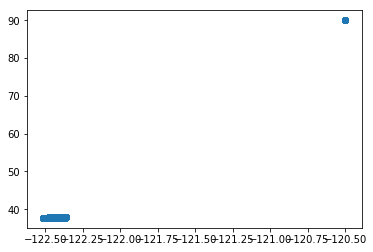

In [8]:
import matplotlib.pyplot as plt


plt.scatter(lons, lats)
plt.show()

This also shows the bad points that are close to 90 in latitudes and close to -120 longitudes so we will execlude these values

In [8]:
# eliminate rows with latitudes out of San Francisco range
train_df = train_df.drop(train_df[(train_df['Y'] > 37.84) | (train_df['Y'] < 37.7)].index)
# eliminate rows with longitudes out of San Francisco range
train_df = train_df.drop(train_df[((train_df['X'] > -122.32) | (train_df['X'] < -122.52))].index)
train_df.describe()

,X,Y
count,877982.000000,877982.000000
mean,-122.422763,37.767035
std,0.025285,0.024165
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784368
max,-122.364937,37.819975


## 3. Visualize according to locations

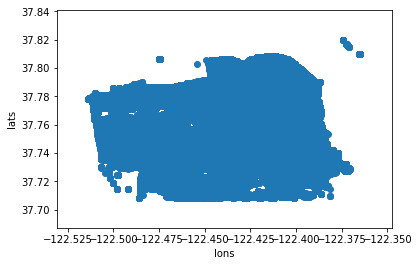

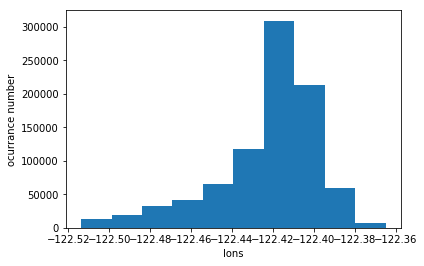

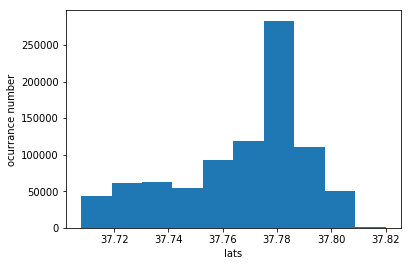

In [9]:
new_lons = train_df['X'] # longitudes 
new_lats = train_df['Y'] # latitudes

# scatter plot for lons vs lats
plt.scatter(new_lons, new_lats)
plt.xlabel('lons')
plt.ylabel('lats')
plt.show()

# histogram plot for lons and lats
plt.hist(new_lons)
plt.xlabel('lons')
plt.ylabel('ocurrance number')
plt.show()
plt.hist(new_lats)
plt.xlabel('lats')
plt.ylabel('ocurrance number')
plt.show()

**Observation:**  the most crimes are in the location of longitude = [-122.44, -122.40] and latitude = [37.76, 37.80]

---
Finding number of occurances of for each category in data

In [9]:
from collections import Counter

def printCategoriesOccurrence():
    
    categories = train_df['Category']
    # count the number of occurances for each category
    occurances = Counter(categories)
    sorted_occ = sorted(occurances.items(), key=lambda pair: pair[1], reverse=True)
    for key, value in sorted_occ:
        print key, value
    return sorted_occ
        
sorted_occ = printCategoriesOccurrence()

LARCENY/THEFT 174885
OTHER OFFENSES 126165
NON-CRIMINAL 92300
ASSAULT 76872
DRUG/NARCOTIC 53971
VEHICLE THEFT 53772
VANDALISM 44724
WARRANTS 42206
BURGLARY 36754
SUSPICIOUS OCC 31412
MISSING PERSON 25989
ROBBERY 22999
FRAUD 16679
FORGERY/COUNTERFEITING 10609
SECONDARY CODES 9985
WEAPON LAWS 8555
PROSTITUTION 7484
TRESPASS 7325
STOLEN PROPERTY 4539
SEX OFFENSES FORCIBLE 4387
DISORDERLY CONDUCT 4318
DRUNKENNESS 4280
RECOVERED VEHICLE 3138
KIDNAPPING 2341
DRIVING UNDER THE INFLUENCE 2268
RUNAWAY 1946
LIQUOR LAWS 1903
ARSON 1513
LOITERING 1225
EMBEZZLEMENT 1166
SUICIDE 508
FAMILY OFFENSES 491
BAD CHECKS 406
BRIBERY 289
EXTORTION 256
SEX OFFENSES NON FORCIBLE 148
GAMBLING 146
PORNOGRAPHY/OBSCENE MAT 22
TREA 6


**Observation:**
The most committed crime in San Francisco is the LARCENY/THEFT. TREA is the least.

----
Now, We will plot crimes categories data on map using basemap library from mpl_toolkits.

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


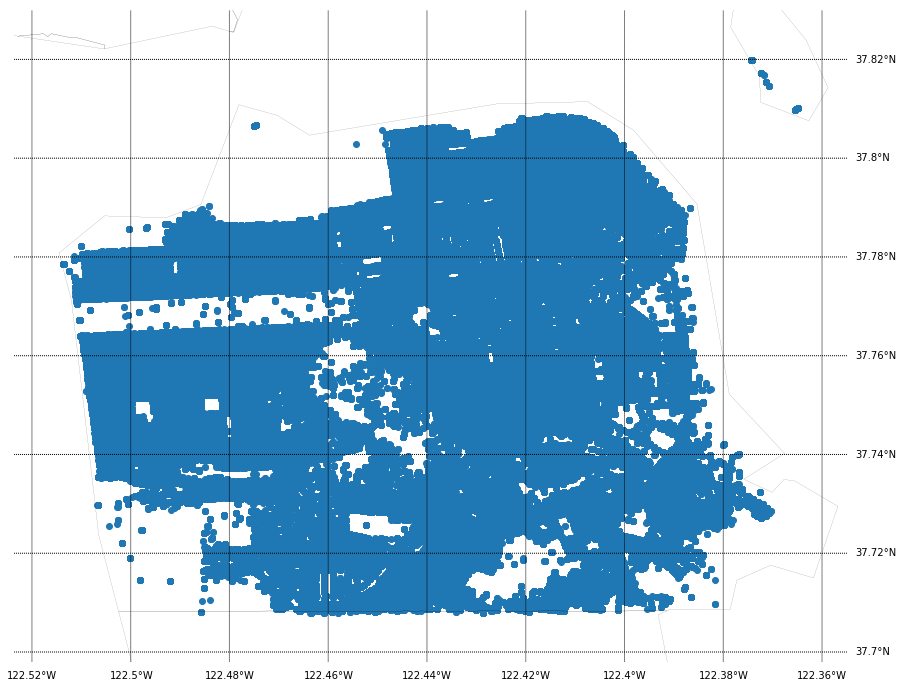

In [11]:
from mpl_toolkits.basemap import Basemap
import numpy as np
# minimum and maximum longitude and latitude for map zooming
lon_min = min(new_lons) 
lon_max = max(new_lons) 
lat_min = min(new_lats) 
lat_max = max(new_lats) 

fig = plt.figure(figsize=(24,12)) # to make plot bigger
fig.add_subplot(111, frame_on=False)

# Here, we add some padding with 0.01 to the map width and height
map = Basemap(
    llcrnrlon=lon_min-0.01,
    llcrnrlat=lat_min-0.01,
    urcrnrlon=lon_max+0.01,
    urcrnrlat=lat_max+0.01
)

parallels = np.arange(37,38,0.02)
meridians = np.arange(-122.6,-122.3,.02)
map.drawcounties()
map.drawparallels(parallels,labels=[False,True,True,False])
map.drawmeridians(meridians,labels=[True,False,False,True])
map.scatter(new_lons, new_lats)

plt.show()

Using contour plot

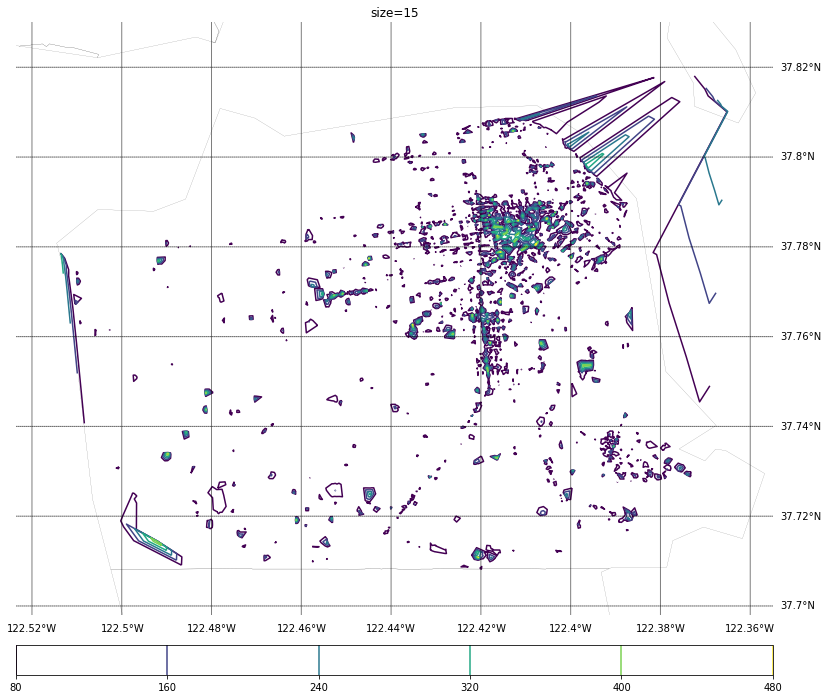

In [36]:
data = train_df.groupby(['X', 'Y']).size().reset_index(name='occurances')
data = data[data.occurances < 500]

fig = plt.figure(figsize=(24,12)) # to make plot bigger
fig.add_subplot(111, frame_on=False)

# Here, we add some padding with 0.01 to the map width and height
map = Basemap(
    llcrnrlon=lon_min-0.01,
    llcrnrlat=lat_min-0.01,
    urcrnrlon=lon_max+0.01,
    urcrnrlat=lat_max+0.01
)

parallels = np.arange(37,38,0.02)
meridians = np.arange(-122.6,-122.3,.02)
map.drawcounties()
map.drawparallels(parallels,labels=[False,True,True,False])
map.drawmeridians(meridians,labels=[True,False,False,True])
# map.scatter(new_lons, new_lats)
x = data.X.as_matrix()
y = data.Y.as_matrix()
z = data.occurances.as_matrix()
mymap= map.contour(x, y, z, tri=True)
map.colorbar(mymap,location='bottom',pad="5%")
plt.title("size="+str(15))
plt.show()

The plots above don't till good information so we will plot each crime category alone in descent order i.e. most committed category first.

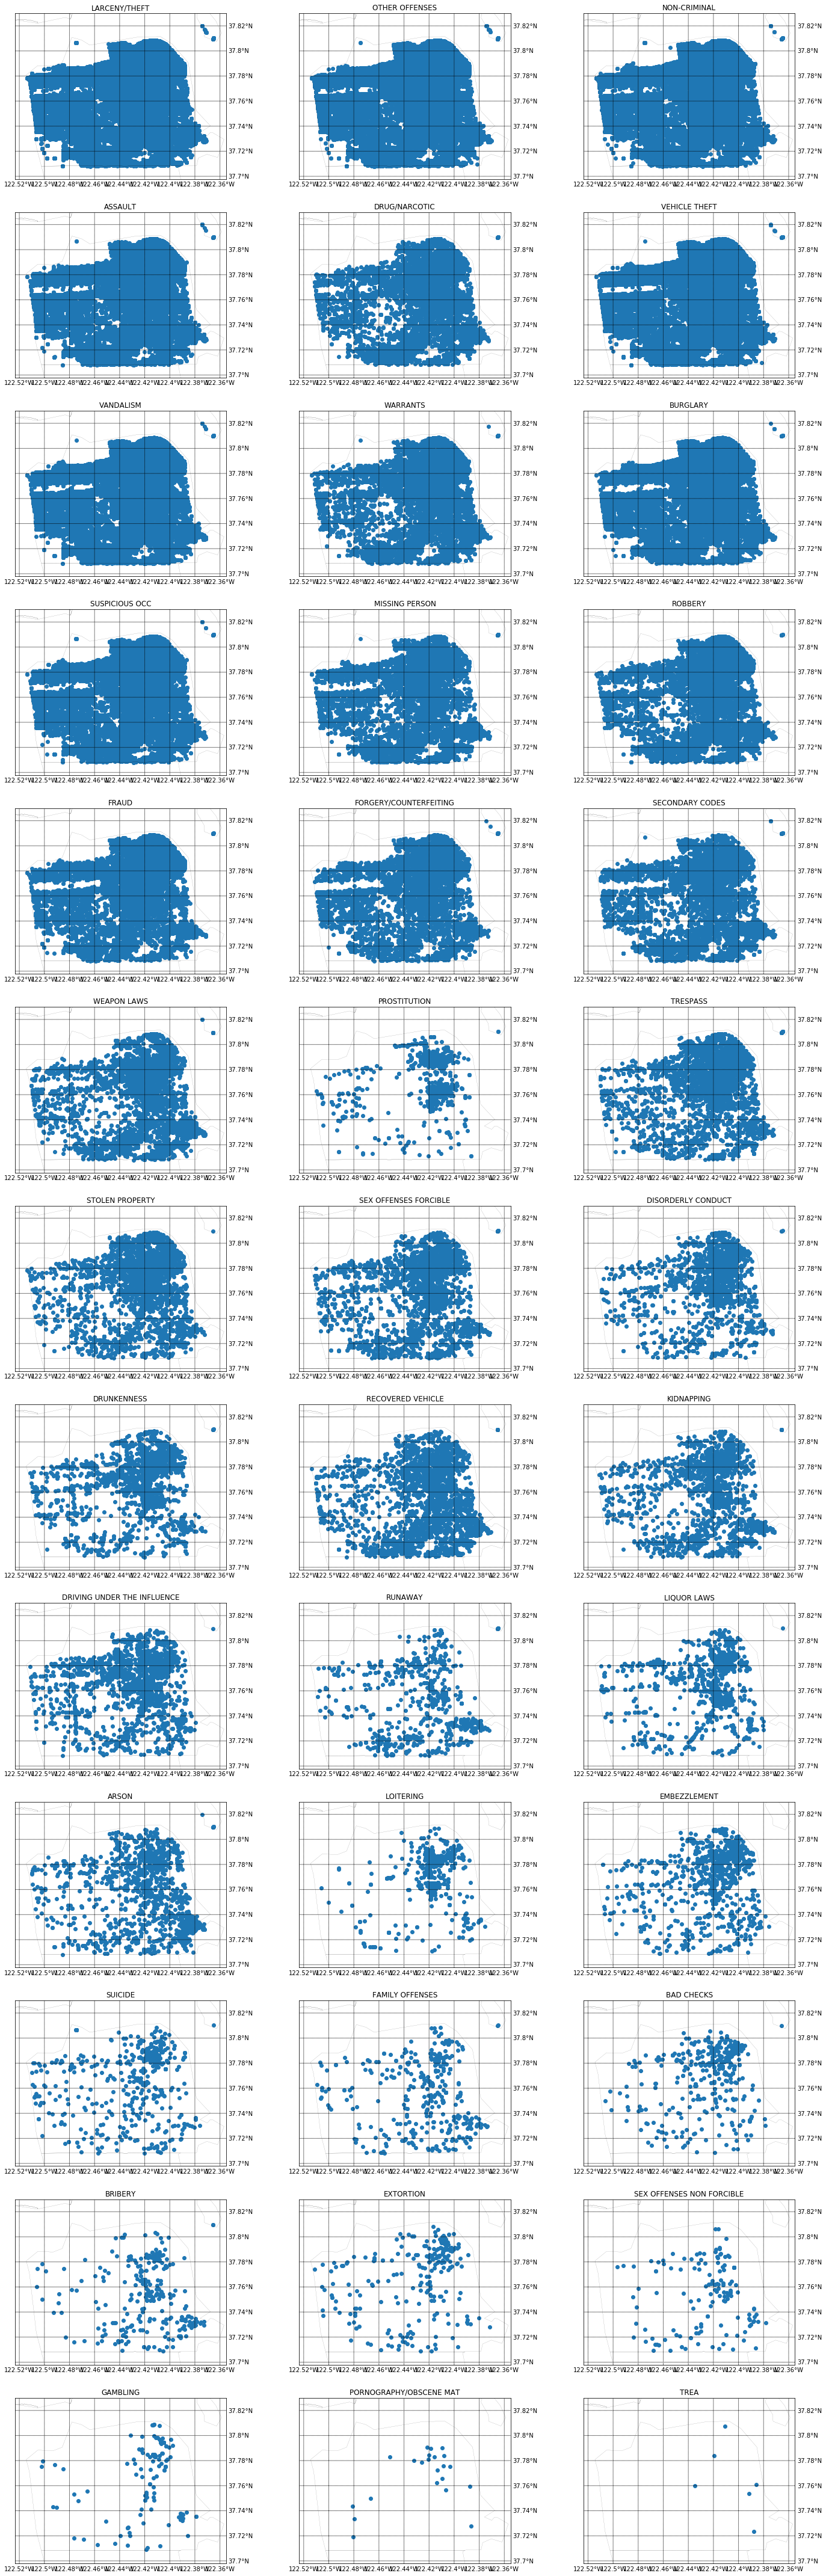

In [54]:
from matplotlib import gridspec

plt.subplots(figsize=(24, 78))
i = 0 # subplot number

grid = gridspec.GridSpec(13,3)
for pair in sorted_occ[:]:
    ax = plt.subplot(grid[i])
    map = Basemap(
        llcrnrlon=lon_min-0.01,
        llcrnrlat=lat_min-0.01,
        urcrnrlon=lon_max+0.01,
        urcrnrlat=lat_max+0.01
    )
    parallels = np.arange(37,38,0.02)
    meridians = np.arange(-122.6,-122.3,.02)
    map.drawcounties()
    map.drawparallels(parallels,labels=[False,True,True,False])
    map.drawmeridians(meridians,labels=[True,False,False,True])
    category_data = train_df[train_df['Category'] == pair[0]]
    
    lons = category_data['X']
    lats = category_data['Y']
    map.scatter(lons, lats)
    plt.title(pair[0]) # pair[0] = category name
    i+=1

plt.show()
    

**Observation:** The maps above till us that there exist some crimes that is focused on certain locations, for example `prostitution` is focused mostly in (37.79N, -122.41W) and (37.76N, -122.41W). Other crimes are spread into the map like `Driving under the influence`.

## 4. Visualize according to time
Visualizing each crime category according to months and week days. We will do this for the most common crime only -i.e. `LARCENY/THEFT`- as example to try to find some pattern according to time.

First, according to each month

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


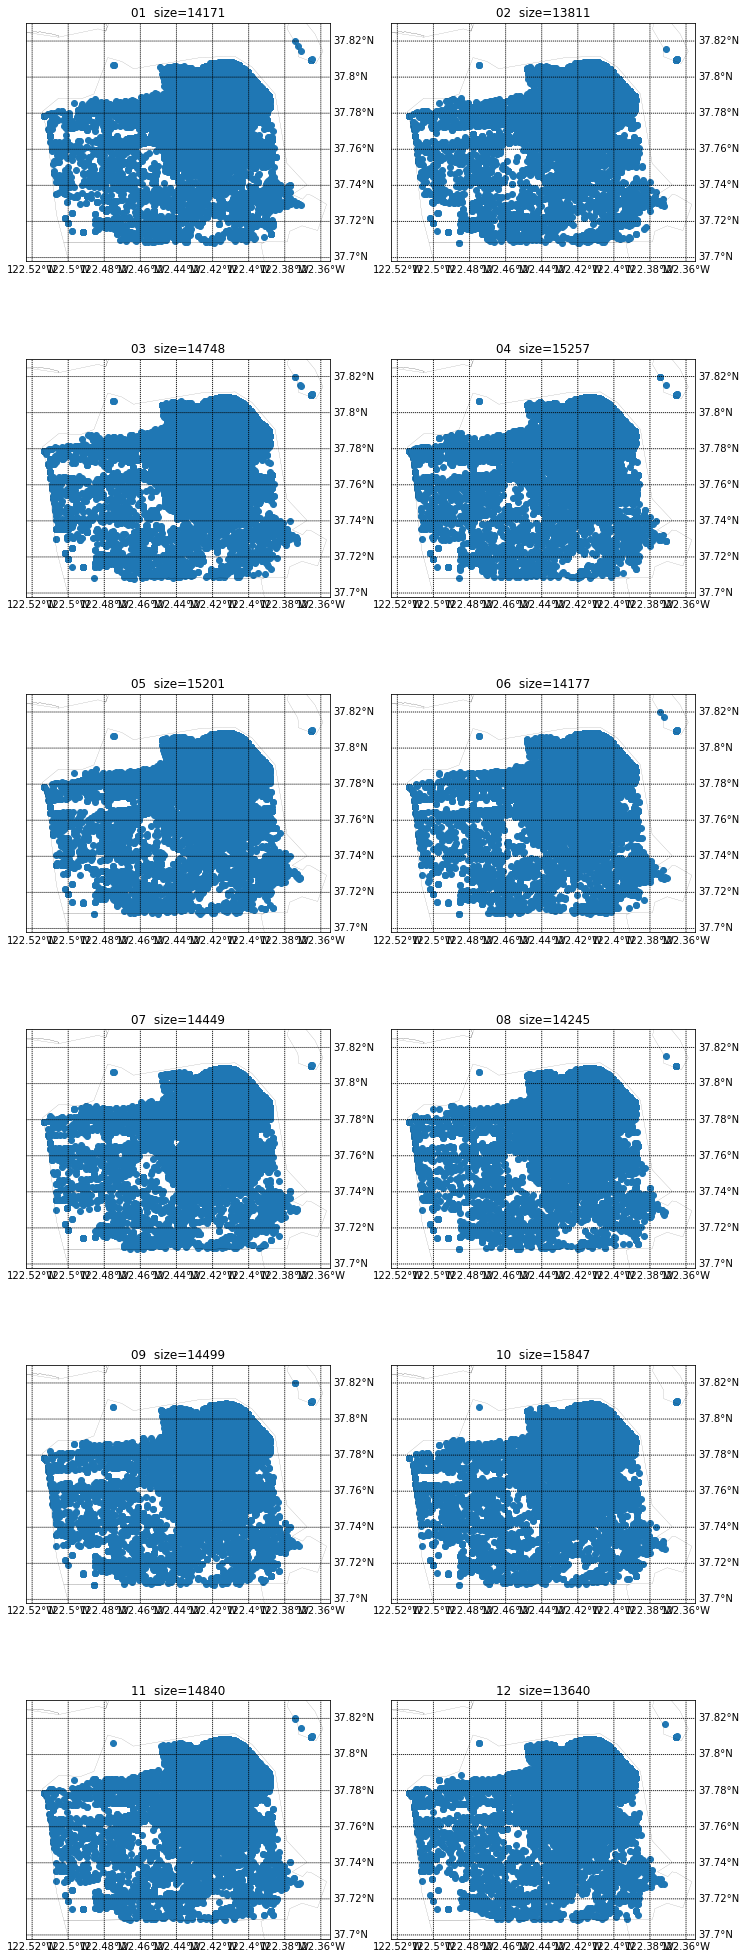

In [39]:
import re

    
plt.subplots(figsize=(12, 36))
i = 0 # subplot number

months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
category = sorted_occ[0][0]
category_data = train_df[train_df['Category'] == category]

def getMonthData(month):
    regex = "((19[0-9][0-9])|(20[0-9][0-9])-" + month + "-[0-9]* (\w|:)*)"
    columns = ['Dates', 'Category', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
    result = pd.DataFrame(columns=columns)
    for index, row in category_data.iterrows():
        if re.match(regex,row['Dates']):
            row = row.transpose()
            result = result.append(row)
            category_data.drop(index)
    return result

grid = gridspec.GridSpec(6,2)
for month in months:
    ax = plt.subplot(grid[i])
    map = Basemap(
        llcrnrlon=lon_min-0.01,
        llcrnrlat=lat_min-0.01,
        urcrnrlon=lon_max+0.01,
        urcrnrlat=lat_max+0.01
    )
    parallels = np.arange(37,38,0.02)
    meridians = np.arange(-122.6,-122.3,.02)
    map.drawcounties()
    map.drawparallels(parallels,labels=[False,True,True,False])
    map.drawmeridians(meridians,labels=[True,False,False,True])
    month_data = getMonthData(month)
    lons = month_data['X']
    lats = month_data['Y']
    map.scatter(lons, lats)
    plt.title(month + "  size=" + str(len(month_data)))
    i+=1

plt.show()


according to days of week

0
1
2
3
4
5
6


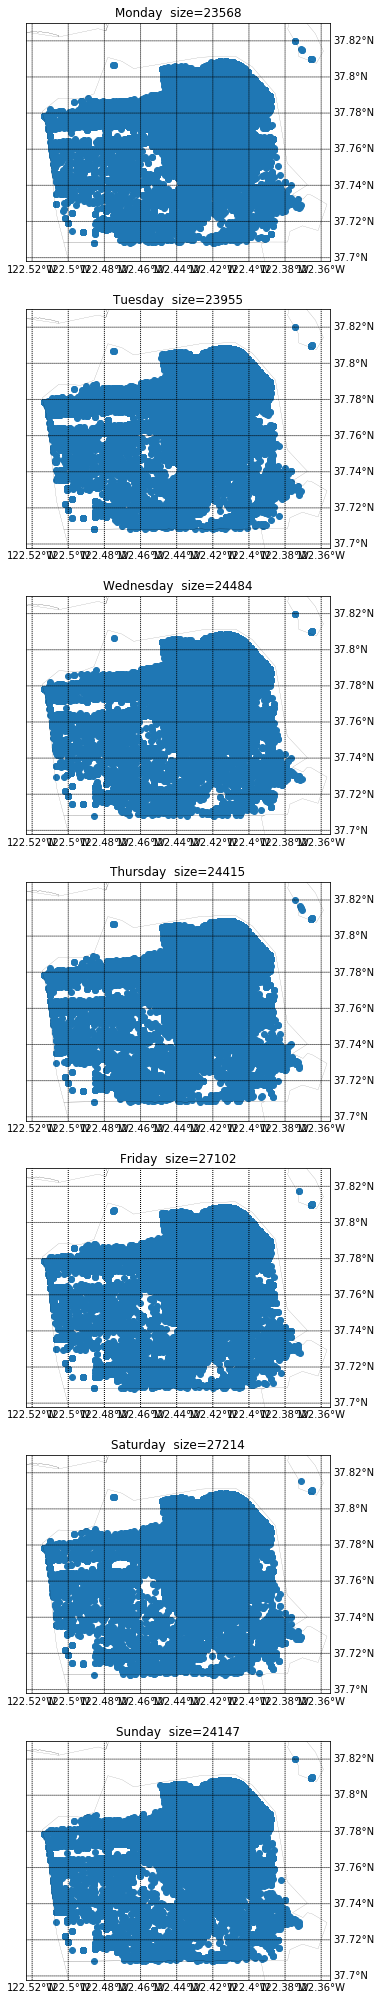

In [41]:
plt.subplots(figsize=(12, 36))
i = 0 # subplot number

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
category = sorted_occ[0][0]
category_data = train_df[train_df['Category'] == category]

grid = gridspec.GridSpec(7,1)
for day in days:
    ax = plt.subplot(grid[i])
    map = Basemap(
        llcrnrlon=lon_min-0.01,
        llcrnrlat=lat_min-0.01,
        urcrnrlon=lon_max+0.01,
        urcrnrlat=lat_max+0.01
    )
    parallels = np.arange(37,38,0.02)
    meridians = np.arange(-122.6,-122.3,.02)
    map.drawcounties()
    map.drawparallels(parallels,labels=[False,True,True,False])
    map.drawmeridians(meridians,labels=[True,False,False,True])
    day_data = category_data[category_data['DayOfWeek'] == day]
    lons = day_data['X']
    lats = day_data['Y']
    map.scatter(lons, lats)
    plt.title(day + "  size=" + str(len(day_data)))
    print i
    i+=1

plt.show()

**Observation:** As shown in plots above the crime pattern is likely to be equally ditributed on months and days of week. Some months like `April` and `May` have more crime rate than others like `December` and `Junauary`, and logically this may be due to the weather conditions that is good at spring and bad in winter.
Also days that before the week end is more than other days a little. 

## 5. Data preprocessing

**Enhanceing data imbalancing:**
Now as shown above, The data is imbalanced and some features has very low number of contributions in data existance. And to enhance imbalanced data we can replicate the data with low contributions and give them more weights in training.

Here we will replicate the data that has less than 1000 occurances to be 1000. Later we will give them more weights while training.

In [10]:
import math
# if category size < 1000, duplicate it to be = 1000
for key,value in sorted_occ:
    if value<1000:
        
        temp = train_df[train_df['Category'] == key]
        train_df = train_df.append([temp]*int(math.ceil((1000-value)/float(value))), ignore_index=True)

sorted_occ = printCategoriesOccurrence()

LARCENY/THEFT 174885
OTHER OFFENSES 126165
NON-CRIMINAL 92300
ASSAULT 76872
DRUG/NARCOTIC 53971
VEHICLE THEFT 53772
VANDALISM 44724
WARRANTS 42206
BURGLARY 36754
SUSPICIOUS OCC 31412
MISSING PERSON 25989
ROBBERY 22999
FRAUD 16679
FORGERY/COUNTERFEITING 10609
SECONDARY CODES 9985
WEAPON LAWS 8555
PROSTITUTION 7484
TRESPASS 7325
STOLEN PROPERTY 4539
SEX OFFENSES FORCIBLE 4387
DISORDERLY CONDUCT 4318
DRUNKENNESS 4280
RECOVERED VEHICLE 3138
KIDNAPPING 2341
DRIVING UNDER THE INFLUENCE 2268
RUNAWAY 1946
LIQUOR LAWS 1903
ARSON 1513
FAMILY OFFENSES 1473
LOITERING 1225
BAD CHECKS 1218
EMBEZZLEMENT 1166
BRIBERY 1156
SEX OFFENSES NON FORCIBLE 1036
EXTORTION 1024
GAMBLING 1022
SUICIDE 1016
PORNOGRAPHY/OBSCENE MAT 1012
TREA 1002


### Data Encoding

In [ ]:
# spliting train data into target and other features
target = train_df['Category']
data = train_df.drop(columns=['Category'])

4 features from the data given are not numbers, so we need to convert them into numbers in order to be able to train the models on them. These features are:
* Dates
* DayOfWeek
* PdDistrict
* Address

We can use label Encoding and 1-hot encoding. 1-hot encoding may produce very high numbers of dimensions due to the many data labeles in each feature, but it is better due to the problem with label encoding is that it assumes higher the categorical value, better the category which produce more errors.

So let's use one-hot encoding with the features with little unique values and use the label encoding with the features with very high unique values


In [7]:
features = ['Dates', 'DayOfWeek', 'PdDistrict', 'Address']
for feature in features:
    print "feature: {}    unique_size: {}".format(feature ,len(data[feature].unique()))

feature: Dates    unique_size: 389229
feature: DayOfWeek    unique_size: 7
feature: PdDistrict    unique_size: 10
feature: Address    unique_size: 23191


As shown above, `DayOfWeek` and `PdDistrict` can one-hot encoded. But `Address`, `Dates` should be encoded using label encoding.

For `Dates`, lets neglect the miniutes and seconds of each date as this will not affect greatly on our predictions but on the contrary it may produce good environment for overfitting, so let's convert `Dates` by our hand to integers then convert `Address` using `cat.codes` tool.

### 5.1 Label Encoding

In [12]:
# convert given list of dates it will trim seconds, minutes and return result
def trimMinAndSecFromDates(dates):
    result = []
    for date in dates:
        result.append(date[:-6])
    return result

# trim minutes and seconds from dates
data['Dates'] = trimMinAndSecFromDates(data['Dates'])

# encode Dates using label encoding
data['Dates'] = data['Dates'].astype('category')
data['Dates_int'] = data['Dates'].cat.codes

# encode Address using label encoding
data['Address'] = data['Address'].astype('category')
data['Address_int'] = data['Address'].cat.codes

data.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates_int,Address_int
0,2015-05-13 23,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,53629,19762
1,2015-05-13 23,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,53629,19762
2,2015-05-13 23,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,53629,22661
3,2015-05-13 23,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,53629,4266
4,2015-05-13 23,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,53629,1843


Now let's drop the `Dates` and `Address` cols as they are now useless.

In [13]:
data.drop(columns=['Dates', 'Address'], inplace=True)
data.head()

,DayOfWeek,PdDistrict,X,Y,Dates_int,Address_int
0,Wednesday,NORTHERN,-122.425892,37.774599,53629,19762
1,Wednesday,NORTHERN,-122.425892,37.774599,53629,19762
2,Wednesday,NORTHERN,-122.424363,37.800414,53629,22661
3,Wednesday,NORTHERN,-122.426995,37.800873,53629,4266
4,Wednesday,PARK,-122.438738,37.771541,53629,1843


### 5.2 One-Hot Encoding
Now let's one hot encode the `DayOfWeek` and `PdDistrict` using pandas.get_dummies()

In [14]:
# get dummies for each feature
DayOfWeek_dummies = pd.get_dummies(data['DayOfWeek'])
PdDistrict_dummies = pd.get_dummies(data['PdDistrict'])

# join dummies to the original dataframe
data = data.join(DayOfWeek_dummies)
data = data.join(PdDistrict_dummies)

data.head()

,DayOfWeek,PdDistrict,X,Y,Dates_int,Address_int,Friday,Monday,Saturday,Sunday,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,Wednesday,NORTHERN,-122.425892,37.774599,53629,19762,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Wednesday,NORTHERN,-122.425892,37.774599,53629,19762,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Wednesday,NORTHERN,-122.424363,37.800414,53629,22661,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Wednesday,NORTHERN,-122.426995,37.800873,53629,4266,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Wednesday,PARK,-122.438738,37.771541,53629,1843,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Now let's drop the `DayOfWeek` and `PdDistrict` cols as they are now useless.

In [15]:
data.drop(columns=['DayOfWeek', 'PdDistrict'], inplace=True)
print "data size =",len(data)
data.head()

data size = 885669


,X,Y,Dates_int,Address_int,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,-122.425892,37.774599,53629,19762,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,53629,19762,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,53629,22661,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,53629,4266,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,53629,1843,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Observation:** Now the training data are ready to be used for our models with 21 dimensions and 877982 samples to be traind on

## 5. Data splitting
split training data into train set with size 80% and test set with size 20% - i.e. validation set.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(data, target, test_size=0.2, random_state=0, stratify=target)
print "train size: {}, test size: {}".format(X_train.shape[0], X_test.shape[0])

train size: 708535, test size: 177134



--------------
# Models Implementation

We are going to implement various models and train them on our data and comapre their performance later using using mult-class logarithmec loss.

## 1. Implementing Models
In this section, we will train various model on data.

### Training pipline
Now, we will train various learners, so we will make a pipline -i.e function- to call it in training the models instead of repeating it with each model. 

The function returns a result dict which contains the train time, fbeta score and log loss of all samples in train data.

**Hint:** We shouldn't use accuracy here as the data is imbalanced.

In [56]:
from sklearn.metrics import log_loss, fbeta_score
from time import time

# train function takes learner, the train data and target
def train_test_pipeline(learner, X_train, y_train, X_test, y_test):
    
    results = {}
    
    # training learner
    start = time()
    learner.fit(X_train, y_train)
    end = time()
    results['train_time'] = end - start
    
    # predict samples in training set
    predictions = learner.predict(X_train)
    predictions_proba = learner.predict_proba(X_train)
    
    # calculate fbeta and log loss
    results['fscore'] = fbeta_score(y_train, predictions, beta=.5, average='micro')
    results['logloss'] = log_loss(y_train, predictions_proba)
    
    # predict testing samples and time of prediction
    start = time()
    predictions = learner.predict(X_test)
    predictions_proba = learner.predict_proba(X_test)
    end = time()
    results['test_time'] = end - start
    
    # calculate fbeta and log loss for testing set
    results['fscore_test'] = fbeta_score(y_test, predictions, beta=.5, average='micro')
    results['logloss_test'] = log_loss(y_test, predictions_proba)
    
    
    print "{} trained".format(learner.__class__.__name__)
    
    return results

# do train_test_pipeline then visualize resutls for given models on first n samples and test on first m
# returns predictions proba for last model in given list - this will be used for 1 model only -
def train_test_models(models, names=None, n=len(y_train), m=len(y_test)):
    results = {}
    i = 0
    for model in models:
        if not names:
            model_name = model.__class__.__name__
        else:
            model_name = names[i]
            i += 1
        results[model_name] = train_test_pipeline(model, X_train[:n], y_train[:n], X_test[:m], y_test[:m])

    # print results
    for model in results:
        model_res = results[model]
        print "model: {}".format(model)
        print "fscore:\t\t{}\nlogloss:\t{}\ntrain time:\t{}".format(model_res['fscore'], model_res['logloss'], model_res['train_time'])
        print "fscore_test:\t\t{}\nlogloss_test:\t{}\ntest time:\t{}".format(model_res['fscore_test'], model_res['logloss_test'], model_res['test_time'])

    # visualize the results    
    visualize(results, random_results)

### Visualization
visualize training and testing results

In [18]:
import matplotlib.pyplot as plt
def visualize(results, random_results):
    bar_width = 0.3
    fig, ax = plt.subplots(6,1,figsize = (12,32))
    for j, metric in enumerate(['train_time', 'fscore', 'logloss', 'test_time', 'fscore_test', 'logloss_test']):
        ax[j].set_xlabel("Learners")
        ax[j].set_ylabel(metric)
        ax[j].set_title(metric)
        for k, learner in enumerate(results.keys()):
            ax[j].bar(learner, results[learner][metric], width=bar_width)
    
    # add horizontal line for random model results
    ax[0].axhline(y=random_results['train_time'], linestyle='dashed')
    ax[1].axhline(y=random_results['fscore'], linestyle='dashed')
    ax[2].axhline(y=random_results['logloss'], linestyle='dashed')  
    ax[3].axhline(y=random_results['test_time'], linestyle='dashed')
    ax[4].axhline(y=random_results['fscore_test'], linestyle='dashed')
    ax[5].axhline(y=random_results['logloss_test'], linestyle='dashed')        

### 1.1 Naive Random Predictor
Random predictor which always predict the category randomly.

In [19]:
import random
class random_model:
 
    def __init__(self, categories):
        self.categories = categories
        self.classes_ = categories

    # always return a random value from categories
    def __getRandomValue(self): return random.choice(self.categories) 
    
    # no need for fit here
    def fit(self, X_train, y_train): pass
    
    def predict(self, X):
        result = [[] for i in range(len(X))]
        for j in range(len(X)):
            result[j] = self.__getRandomValue()
        return result
        
    def predict_proba(self, X):
        result = [[] for i in range(len(X))]
        for j in range(len(X)):
            row = [0.0]*len(self.categories)
            prediction = self.__getRandomValue()
            for i in range(len(self.categories)): 
                if(self.categories[i] == prediction):
                    row[i] = 1.0
                    break
            result[j] = row
        return result

### 1.2 other models
In this section, We will train other models using training pipline that we implemented previously. The models to use are:
* KNNeighbors
* DecisionTree
* ExtraTrees
* Neural network MLP
* Support vector machine
* xgboost

#### 1.2.1 Initializing models
Here, we enhance imbalanced data more by putting the `class_weight` parameter = `balanced` which mean that the weights will be automatically adjusted inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier

# initializing models
model_KNN = KNeighborsClassifier(n_jobs=-1, weights='distance')
model_tree = DecisionTreeClassifier(class_weight='balanced')
model_extraTrees = ExtraTreesClassifier(n_jobs=-1, class_weight='balanced')
model_NN = MLPClassifier(learning_rate='invscaling', shuffle=True)
model_SVC = SVC(probability=True, class_weight='balanced') # One-to-One
model_XGB = XGBClassifier(one_drop=1)

#### 1.2.2 get random model results

In [22]:
# get random model results
model_random = random_model(categories=target.unique())
random_results = train_test_pipeline(model_random, X_train, y_train, X_test, y_test)

random_model trained


#### 1.2.3 train and visualize other models with small number of samples

model: ExtraTreesClassifier
fscore:		0.997
logloss:	0.00565870109054
train time:	0.264461994171
model: MLPClassifier
fscore:		0.1694
logloss:	27.0442896039
train time:	1.86609697342
model: KNeighborsClassifier
fscore:		0.997
logloss:	0.0041588830834
train time:	0.0508298873901
model: SVC
fscore:		0.3909
logloss:	3.50766586743
train time:	160.876952887
model: DecisionTreeClassifier
fscore:		0.997
logloss:	0.00565870109054
train time:	0.185271978378
model: XGBClassifier
fscore:		0.2997
logloss:	2.23312758397
train time:	26.6417489052


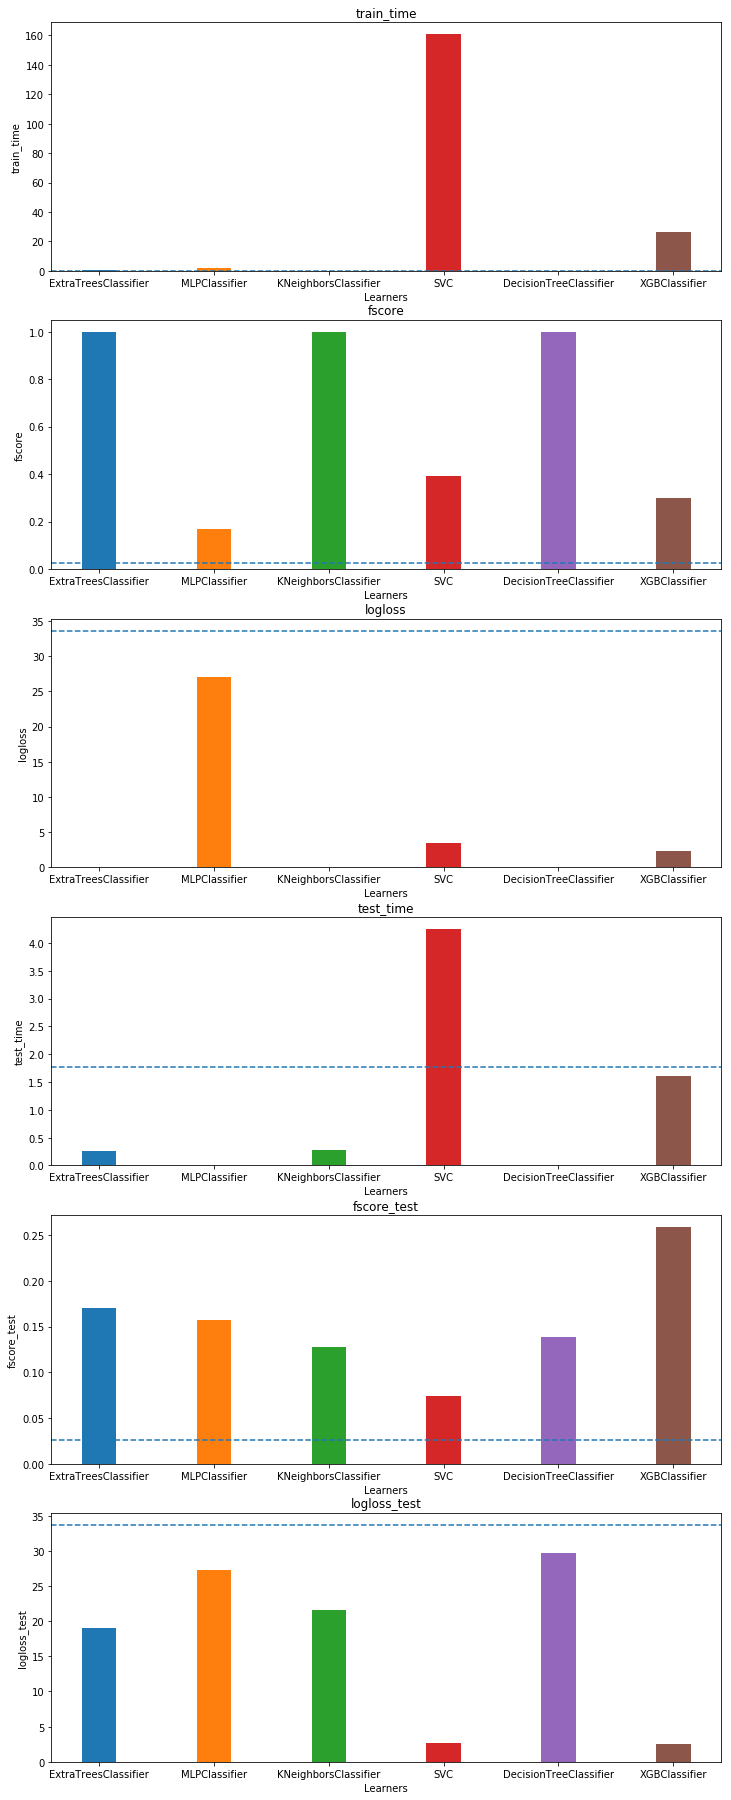

In [19]:
models = [model_KNN, model_tree, model_extraTrees, model_NN, model_SVC, model_XGB]
train_test_models(models, n=10000, m=2000)

**Observation:**

For training:
* The slowest model is SVC then XGBClassifier
* All models do better than random predictor

For test data: 
* The best model in f1 score and logloss is XGBClassifier then SVC
* The slowest model in testing time is SVC the XGBClassifier
* All models do better thean random predictor
    
As shown, It seems that the best model to use is XGBClassifier due to it's scores and it has a suitable time in training and testing. SVC also did well but it needs huge amount of time in processing data in training and testing.

let's train XGBClassifier on all samples and see the results

model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', one_drop=1,
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
fscore:		0.257541264722
logloss:	2.48690374277
train time:	3017.42051196


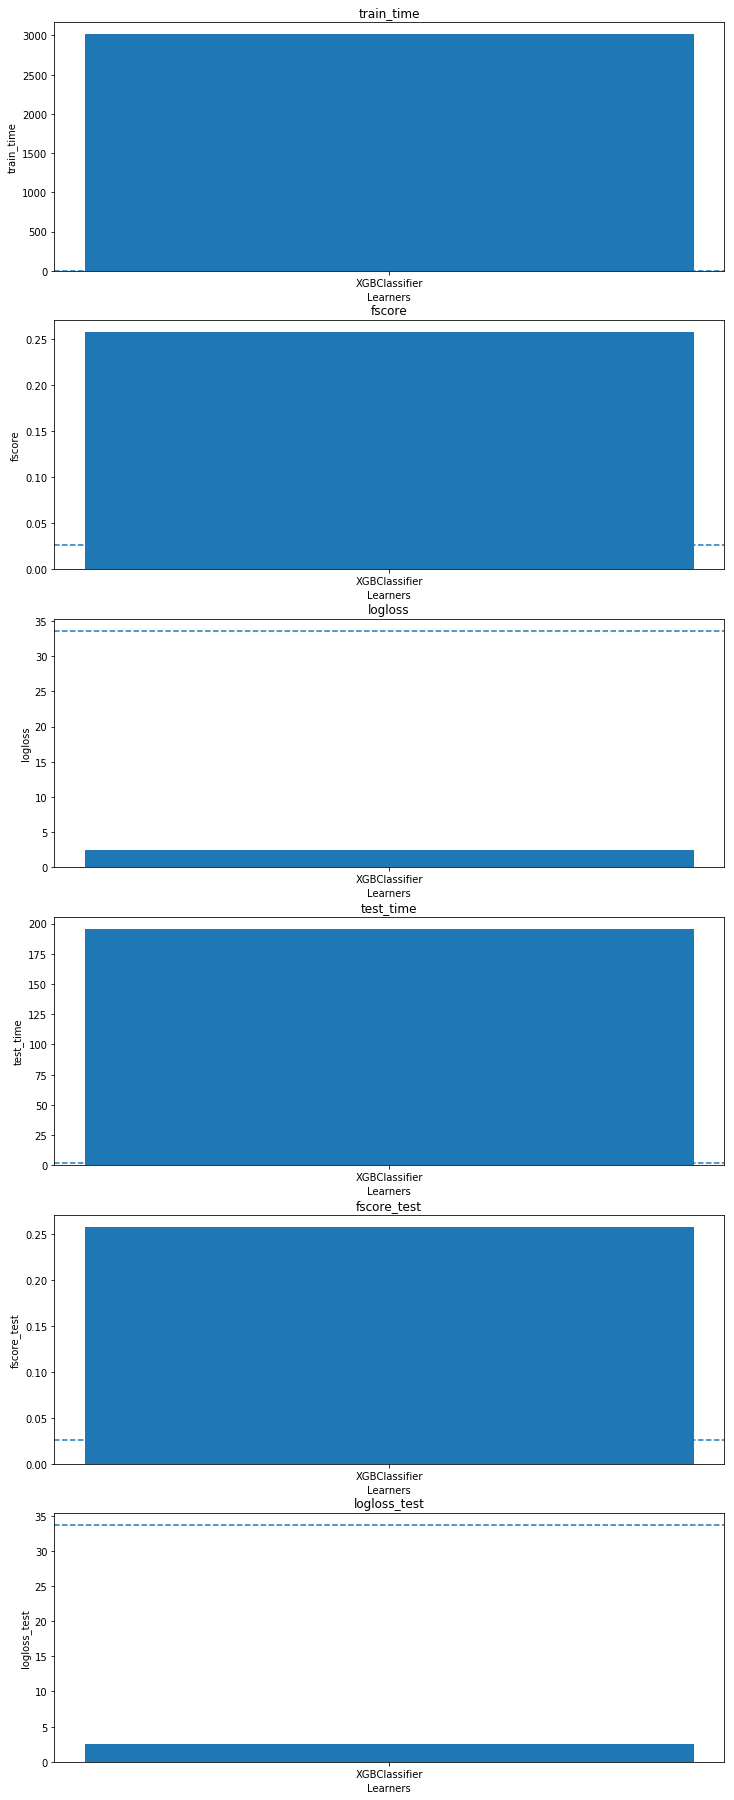

In [26]:
# training XGBClassifier on all samples
models = [model_XGB]
train_test_models(models)

The XGBClassifier gives bad results than expected, This is due to that at first time we trained on very small numbers of training data, Now, let's try other classifiers on all data except SVC and ExtraTree due to that they need huge amount of available resources.

KNeighborsClassifier trained
DecisionTreeClassifier trained
MLPClassifier trained
model: MLPClassifier
fscore:		0.200578658782
logloss:	2.6918295403
train time:	511.115532875
model: DecisionTreeClassifier
fscore:		0.865415258244
logloss:	0.282391200185
train time:	23.2026150227
model: KNeighborsClassifier
fscore:		0.873238442702
logloss:	0.217253267588
train time:	6.08392095566


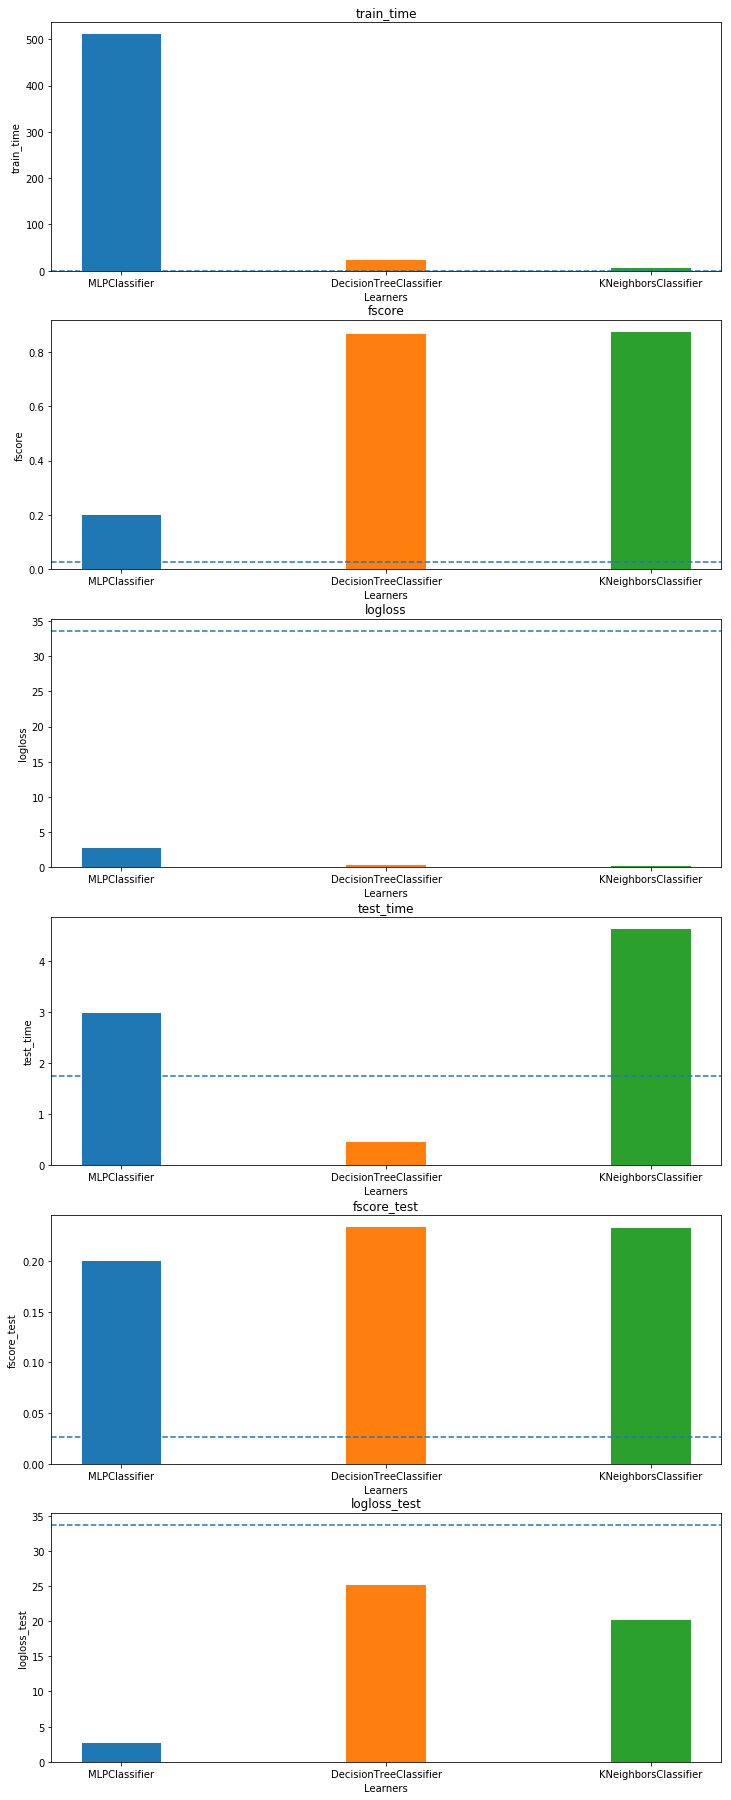

In [18]:
# training other models on all data
models = [model_KNN, model_tree, model_NN]
train_test_models(models)

MLPClassifier gives the best results for all data from all other predictors. It almost equal to XGBClassifier but faster 6 times in training than XGBClassifier.
Now, let's tune MLPClassifier parameters.

---
## 2 . Model Refinement
Let's test for changing hiddenlayers, learning rate initialization value and solver algorithm used.

MLPClassifier trained
MLPClassifier trained
MLPClassifier trained
MLPClassifier trained
MLPClassifier trained
MLPClassifier trained
model: model 1
fscore:		0.202650539493
logloss:	2.69589724069
train time:	736.712579966
fscore_test:		0.201847189134
logloss_test:	2.69572720425
test time:	3.16479301453
model: model 2
fscore:		0.211278200795
logloss:	2.6698351483
train time:	875.900490046
fscore_test:		0.211636388271
logloss_test:	2.66912057784
test time:	3.05096507072
model: model 3
fscore:		0.19692040619
logloss:	2.69480611944
train time:	487.643851042
fscore_test:		0.195004911536
logloss_test:	2.69483187014
test time:	2.83388090134
model: model 4
fscore:		0.183698758706
logloss:	7.63172067913
train time:	401.632124901
fscore_test:		0.184210823444
logloss_test:	7.63454862529
test time:	2.01871585846
model: model 5
fscore:		0.0380475205883
logloss:	33.1368674442
train time:	173.265577793
fscore_test:		0.0387051610645
logloss_test:	33.1240291733
test time:	3.8417570591
model: model 6
fsco

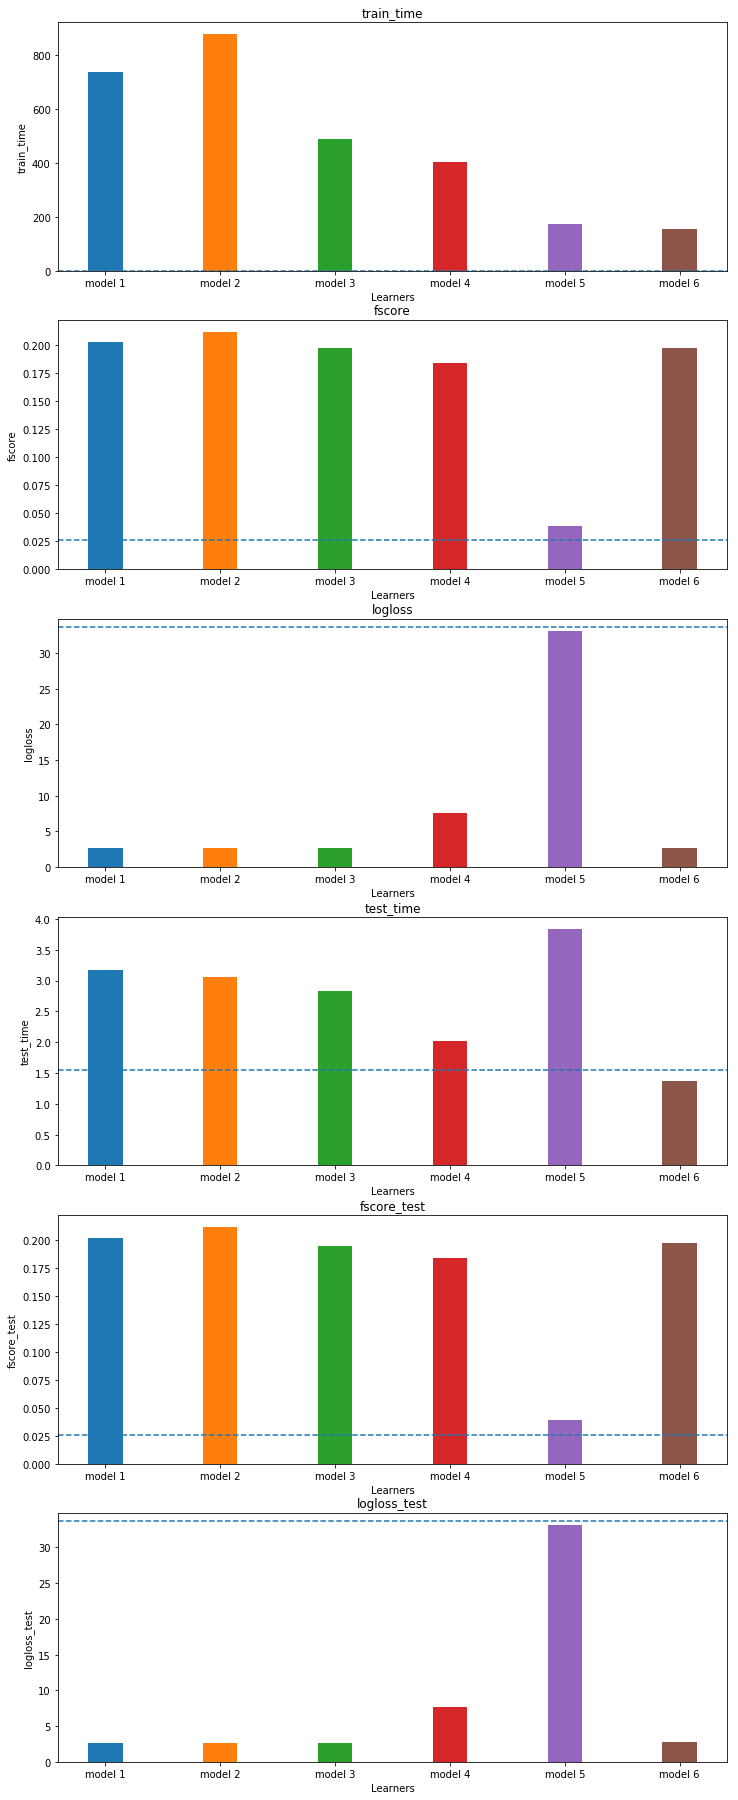

In [47]:
model_NN_tuned1 = MLPClassifier(learning_rate='invscaling', shuffle=True, learning_rate_init=0.001,
                               hidden_layer_sizes=100, solver='adam')
model_NN_tuned2 = MLPClassifier(learning_rate='adaptive', shuffle=True, learning_rate_init=0.001,
                               hidden_layer_sizes=100, solver='adam')
model_NN_tuned3 = MLPClassifier(learning_rate='adaptive', shuffle=True, learning_rate_init=0.001,
                               hidden_layer_sizes=50, solver='adam')
model_NN_tuned4 = MLPClassifier(learning_rate='adaptive', shuffle=True, learning_rate_init=0.0001,
                               hidden_layer_sizes=200, solver='adam')
model_NN_tuned5 = MLPClassifier(learning_rate='adaptive', shuffle=True, learning_rate_init=0.001,
                               hidden_layer_sizes=100, solver='lbfgs')
model_NN_tuned6 = MLPClassifier(learning_rate='adaptive', shuffle=True, learning_rate_init=0.001,
                               hidden_layer_sizes=100, solver='sgd')

models = [model_NN_tuned1, model_NN_tuned2,model_NN_tuned3,model_NN_tuned4,model_NN_tuned5,model_NN_tuned6]
names = ["model 1", "model 2", "model 3", "model 4", "model 5", "model 6"]
train_test_models(models, names=names)

**Observations:**
Model 2 gives the best logloss on test data

Now, let's try more

Iteration 1, loss = 18.41271100
Iteration 2, loss = 17.01263031
Iteration 3, loss = 15.54544070
Iteration 4, loss = 13.55026567
Iteration 5, loss = 11.49403902
Iteration 6, loss = 9.04583908
Iteration 7, loss = 6.38796348
Iteration 8, loss = 4.42616237
Iteration 9, loss = 3.21665668
Iteration 10, loss = 2.74372384
Iteration 11, loss = 2.71639737
Iteration 12, loss = 2.71030126
Iteration 13, loss = 2.70543778
Iteration 14, loss = 2.70222150
Iteration 15, loss = 2.69489550
Iteration 16, loss = 2.69154963
Iteration 17, loss = 2.68705006
Iteration 18, loss = 2.68280982
Iteration 19, loss = 2.68112898
Iteration 20, loss = 2.68020758
Iteration 21, loss = 2.67604161
Iteration 22, loss = 2.67602646
Iteration 23, loss = 2.67617763
Iteration 24, loss = 2.67526134
Iteration 25, loss = 2.67773711
Iteration 26, loss = 2.68079970
Iteration 27, loss = 2.68178621
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
MLPClassifier trained
model: MLPClassifier
fscore

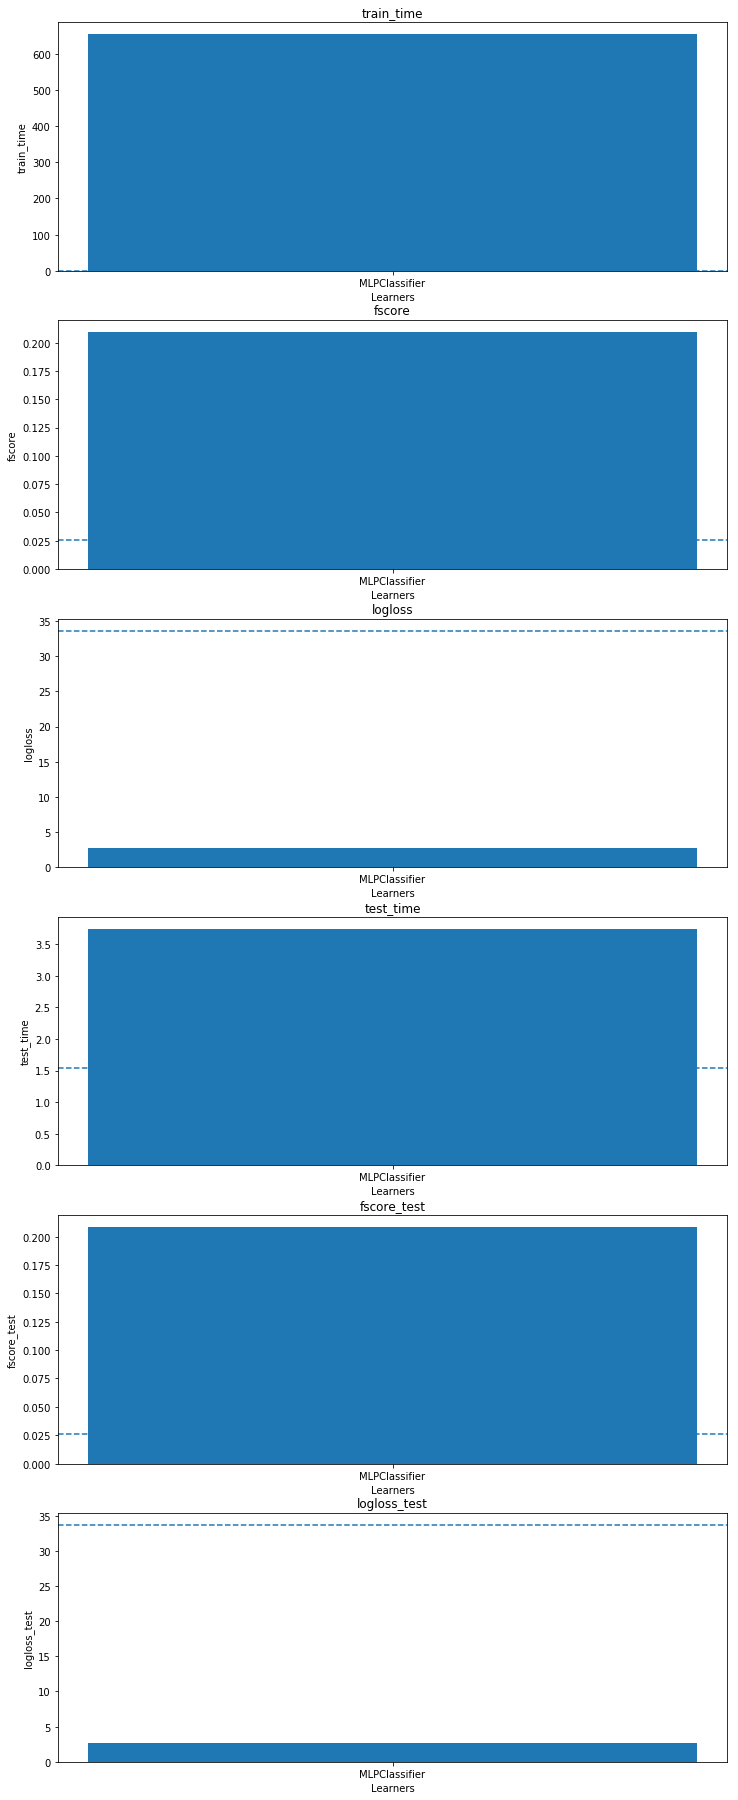

In [61]:
model_NN_tuned = MLPClassifier(learning_rate='adaptive', shuffle=True,
                               hidden_layer_sizes=100, solver='adam', verbose=True)

models = [model_NN_tuned]
train_test_models(models)

after trying the following parameters:
* `identity` activation instead of `relu`
* `epsilon` = 10e-4 instead of default value which = 1e-8
* `stop_early` which make the training faster

The logloss and fscore became worse than the perviouse reached value which make `loss = 2.669` So we will use this last model with these parameters.

## 3. Predict final results on testing data given

### 3.1 Testing data preprocessing 

In [62]:
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [7]:
# encode Dates and Address
test_df['Dates'] = trimMinAndSecFromDates(test_df['Dates'])
test_df['Dates'] = test_df['Dates'].astype('category')
test_df['Dates_int'] = test_df['Dates'].cat.codes
test_df['Address'] = test_df['Address'].astype('category')
test_df['Address_int'] = test_df['Address'].cat.codes
test_df.drop(columns=['Dates', 'Address'], inplace=True)

# encode DayOfWeek and PdDistrict
DayOfWeek_dummies = pd.get_dummies(test_df['DayOfWeek'])
PdDistrict_dummies = pd.get_dummies(test_df['PdDistrict'])
test_df = test_df.join(DayOfWeek_dummies)
test_df = test_df.join(PdDistrict_dummies)
test_df.drop(columns=['DayOfWeek', 'PdDistrict'], inplace=True)

# drop id column
test_df.drop(columns=['Id'], inplace=True)

test_df.head()

,X,Y,Dates_int,Address_int,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,-122.399588,37.735051,54047,6407,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,54047,9744,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,54047,6336,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,54047,10633,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,54047,10633,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### 3.2 Predict results

In [75]:
results = model_NN_tuned.predict_proba(test_df)

In [79]:
results.shape

(884262, 39)

### 3.3 Put results into pandas dataframe

In [82]:
output_df = pd.DataFrame(data=results, columns=model_NN_tuned.classes_)

In [83]:
output_df.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.002057,0.092128,0.001715,0.001615,0.056414,0.004348,0.002111,0.041271,0.004658,0.001680,...,0.001445,0.005197,0.001516,0.040124,0.001922,0.009101,0.057359,0.063644,0.039869,0.009625
1,0.002057,0.092128,0.001715,0.001615,0.056414,0.004348,0.002111,0.041271,0.004658,0.001680,...,0.001445,0.005197,0.001516,0.040124,0.001922,0.009101,0.057359,0.063644,0.039869,0.009625
2,0.001848,0.094661,0.001734,0.001522,0.054446,0.004737,0.001954,0.047573,0.004745,0.001648,...,0.001366,0.005118,0.001477,0.039213,0.001204,0.009591,0.053182,0.060225,0.044043,0.009819
3,0.002042,0.092348,0.001575,0.001583,0.050011,0.004382,0.002172,0.042469,0.004780,0.001493,...,0.001392,0.005215,0.001459,0.040158,0.001727,0.008617,0.056804,0.064824,0.040669,0.009628
4,0.002042,0.092348,0.001575,0.001583,0.050011,0.004382,0.002172,0.042469,0.004780,0.001493,...,0.001392,0.005215,0.001459,0.040158,0.001727,0.008617,0.056804,0.064824,0.040669,0.009628


**Produce the results into csv file: **

In [98]:
output_df.index.name = 'Id'
output_df.to_csv("output.csv")